link dataset : https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

 98% 524M/534M [00:03<00:00, 165MB/s]
100% 534M/534M [00:03<00:00, 163MB/s]


In [3]:
!unzip vegetable-image-dataset.zip -d dataset_directory

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: dataset_directory/Vegetable Images/train/Radish/0001.jpg  
  inflating: dataset_directory/Vegetable Images/train/Radish/0002.jpg  
  inflating: dataset_directory/Vegetable Images/train/Radish/0003.jpg  
  inflating: dataset_directory/Vegetable Images/train/Radish/0004.jpg  
  inflating: dataset_directory/Vegetable Images/train/Radish/0005.jpg  
  inflating: dataset_directory/Vegetable Images/train/Radish/0006.jpg  
  inflating: dataset_directory/Vegetable Images/train/Radish/0007.jpg  
  inflating: dataset_directory/Vegetable Images/train/Radish/0008.jpg  
  inflating: dataset_directory/Vegetable Images/train/Radish/0009.jpg  
  inflating: dataset_directory/Vegetable Images/train/Radish/0010.jpg  
  inflating: dataset_directory/Vegetable Images/train/Radish/0011.jpg  
  inflating: dataset_directory/Vegetable Images/train/Radish/0012.jpg  
  inflating: dataset_directory/Vegetable Images/train/Radish/0013.jpg  
  inf

In [4]:
!unzip vegetable-image-dataset.zip -d vegetable_image_data

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: vegetable_image_data/Vegetable Images/train/Radish/0001.jpg  
  inflating: vegetable_image_data/Vegetable Images/train/Radish/0002.jpg  
  inflating: vegetable_image_data/Vegetable Images/train/Radish/0003.jpg  
  inflating: vegetable_image_data/Vegetable Images/train/Radish/0004.jpg  
  inflating: vegetable_image_data/Vegetable Images/train/Radish/0005.jpg  
  inflating: vegetable_image_data/Vegetable Images/train/Radish/0006.jpg  
  inflating: vegetable_image_data/Vegetable Images/train/Radish/0007.jpg  
  inflating: vegetable_image_data/Vegetable Images/train/Radish/0008.jpg  
  inflating: vegetable_image_data/Vegetable Images/train/Radish/0009.jpg  
  inflating: vegetable_image_data/Vegetable Images/train/Radish/0010.jpg  
  inflating: vegetable_image_data/Vegetable Images/train/Radish/0011.jpg  
  inflating: vegetable_image_data/Vegetable Images/train/Radish/0012.jpg  
  inflating: vegetable_image_data/Vegetab

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [6]:
path = '/content/vegetable_image_data/Vegetable Images'

In [7]:
import os

In [8]:
kategori = os.listdir(path)
kategori

['validation', 'train', 'test']

#Mengatur path dataset menjadi 3 train, val, test

In [13]:
train_dir = '/content/vegetable_image_data/Vegetable Images'
validation_dir = '/content/vegetable_image_data/Vegetable Images'
test_dir = '/content/vegetable_image_data/Vegetable Images'


## Menggunakan ImageDataGenerator untuk memuat serta melakukan augmentasi pada data

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [15]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

## Split dataset menjadi train, val, dan test

Data Train

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 21000 images belonging to 3 classes.



Data Val



In [17]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 21000 images belonging to 3 classes.


Data Test

In [18]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 21000 images belonging to 3 classes.


## Membuat model sequential

In [19]:
model = Sequential()


## Menggunakan pre-trained model VGG16

In [20]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
base_model.trainable = False

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

58889256/58889256 [==============================] - 0s 0us/step


## Menggunakan optimizer, loss, dan metrics

In [21]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

## Callbacks

In [22]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

## Melatih Model

In [24]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/5
657/657 [==============================] - 200s 304ms/step - loss: -0.5748 - accuracy: 0.7143 - val_loss: -1.1578 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 2/5
657/657 [==============================] - 199s 302ms/step - loss: -0.7558 - accuracy: 0.7143 - val_loss: -1.8265 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 3/5
657/657 [==============================] - 200s 304ms/step - loss: -1.1735 - accuracy: 0.7143 - val_loss: -2.4900 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 4/5
657/657 [==============================] - 200s 305ms/step - loss: -1.9339 - accuracy: 0.7143 - val_loss: -3.2109 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 5/5
657/657 [==============================] - 198s 302ms/step - loss: -2.6958 - accuracy: 0.7143 - val_loss: -4.3198 - val_accuracy: 0.7143 - lr: 0.0010


## Evaluasi Model

In [25]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test lost: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

657/657 [==============================] - 53s 81ms/step - loss: -4.3199 - accuracy: 0.7143
Test lost: -4.319850921630859
Test accuracy: 0.7142857313156128


## Menampilkan grafik pergerakan metrik (akurasi/error) dan loss terhadap epoch baik pada training maupun validation

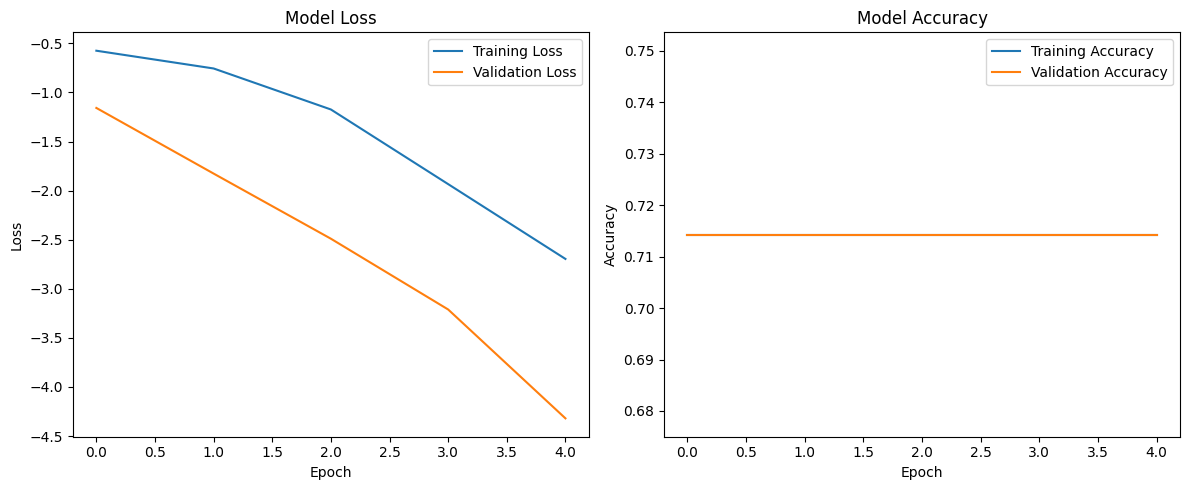

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.tight_layout()
plt.show()